In [1]:
%matplotlib inline

In [6]:
from myla.disp import draw_vectors
from myla.utils import *
from myla import vector

# Matrices

## Linear Equations

Consider the equation of a line in the plane $(x_1,x_2)$.

\begin{eqnarray}
\begin{array}{rcrcr@{\qquad}l}
2x_1 & + & 4x_2 = & 2
\end{array}
\end{eqnarray}

If we plot $x_2$ vs $x_1$, we get the following plot:

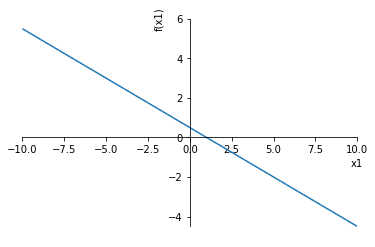

In [8]:
plot_lines(2*x1+4*x2-2, solvefor=x2)

If we now add a second, we have a **system of linear equations**

\begin{eqnarray}
\begin{array}{rcrcrc@{\qquad}l}
2x_1 & + & 4x_2 = & 2 & (a)\\
4x_1 & + & 11x_2 = & 1 & (b)
\end{array}
\end{eqnarray}

Since we have two equations ($a$ and $b$) and two unknowns we can solve this system for $x_1$ and $x_2$:

* multiplying  $a$ by $-2$ and adding it to $b$ yields $x_2=-1$. Substituting this back into $a$ yields $x_1=3$.

If we plot these two equations, the solution (if it exists) is where the two lines intersect.

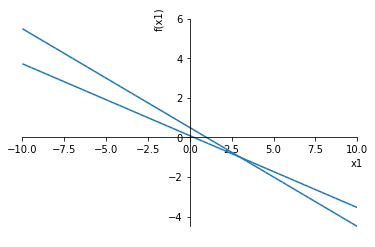

In [9]:
plot_lines(2*x1+4*x2-2, 4*x1+11*x2-1,solvefor=x2)

If we change the equation slightly to

\begin{eqnarray}
\begin{array}{rcrcrc@{\qquad}l}
2x_1 & + & 4x_2 = & 2 & (a)\\
4x_1 & + & 8x_2 = & 1 & (b)
\end{array}
\end{eqnarray}

We get two parallel lines and no solution to the system.

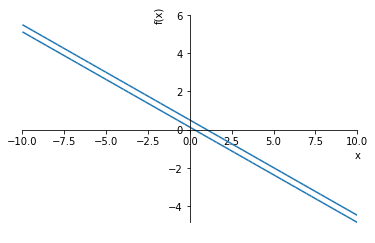

In [10]:
plot_lines(2*x+4*y-2, 4*x+8*y-1, solvefor=y)

This can be rewritten in matrix notation as $\textbf{A}x=b$


\begin{equation}
\begin{bmatrix}
\begin{array}{rr{\qquad}1}
2 & 4 \\
4 & 11 
\end{array}
\end{bmatrix}
\begin{bmatrix}
\begin{array}{r{\quad}1}
x_1\\ x_2
\end{array}
\end{bmatrix} =
\begin{bmatrix}
\begin{array}{r{\quad}1}
2 \\ 1
\end{array}
\end{bmatrix}
\end{equation}

We can see that the rows of the matrix correspond to the coefficients in the equations (row view).

## Row View of Matrices

## Transpose of Matrices and Vectors

In transposing a vector $v$ (depicted as $v^T$), we rewrite it as a row:

\begin{equation}
\begin{bmatrix}
3\\-7\\-2\end{bmatrix}^T = \begin{bmatrix}\begin{array}{lll@{\qquad}l}3 &-7 &-2\end{array}\end{bmatrix}
\end{equation}

The transpose of a matrix is achieved by rewriting the matrix with the rows as columns. For example

\begin{eqnarray}
A=
\begin{bmatrix}
\begin{array}{rr{\qquad}1}
3 & 7 \\
-1 & 5 
\end{array}
\end{bmatrix}\\
A^T=
\begin{bmatrix}
\begin{array}{rr{\qquad}1}
3 & -1 \\
7 & 5 
\end{array}
\end{bmatrix}
\end{eqnarray}

\begin{eqnarray}
B=
\begin{bmatrix}
\begin{array}{rr{\qquad}1}
1 & 3,&-2 \\
1 & -4 & -3 
\end{array}
\end{bmatrix}\\
B^T=
\begin{bmatrix}
\begin{array}{rr{\qquad}1}
1 & 1 \\
3 & -4\\
-2 & -3
\end{array}
\end{bmatrix}
\end{eqnarray}

## Example: Compute Transpose


In [12]:
def transpose(a):
    """
    a: mxn matrix
    returns transposed matrix"""
    
    a_t = [list([0]*len(a)) for _ in range(len(a[0]))]
    
    for i in range(len(a)):
        for j in range(len(a[0])):
            a_t[j][i] = a[i][j]
            
    return a_t
            
        

In [13]:
transpose(((1,3,-2),(1,-4,-3)))

[[1, 1], [3, -4], [-2, -3]]

Returning to our original system of linear equations 

\begin{eqnarray}
\begin{array}{rcrcrc@{\qquad}l}
2x_1 & + & 4x_2 = & 2 & (a)\\
4x_1 & + & 8x_2 = & 1 & (b)
\end{array}
\end{eqnarray}

Which we can write in matrix form as

\begin{equation}
\begin{bmatrix}
\begin{array}{rr{\qquad}1}
2 & 4 \\
4 & 11 
\end{array}
\end{bmatrix}
\begin{bmatrix}
\begin{array}{r{\quad}1}
x_1\\ x_2
\end{array}
\end{bmatrix} =
\begin{bmatrix}
\begin{array}{r{\quad}1}
2 \\ 1
\end{array}
\end{bmatrix}
\end{equation}

We can see that each row in the matrix are the coefficients of each of our linear equations. Thinking of every vector as a column of numbers, a matrix can be viewed as a list of transposed vectors $(\pmb{r_1,r_2})$.

\begin{equation}
\begin{bmatrix}
\begin{array}{rr{\qquad}1}
\pmb{r_1^T} \\
\pmb{r_2^T }
\end{array}
\end{bmatrix}
\begin{bmatrix}
\begin{array}{r{\quad}1}
x_1\\ x_2
\end{array}
\end{bmatrix} =
\begin{bmatrix}
\begin{array}{r{\quad}1}
2 \\ 1
\end{array}
\end{bmatrix}
\end{equation}


\begin{equation}
\begin{bmatrix}
\begin{array}{rr{\qquad}1}
\pmb{r_1^T} \\
\pmb{r_2^T} 
\end{array}
\end{bmatrix}
\pmb{x} =
\pmb{b}
\end{equation}

## Matrix-Vector Multiplication

Matrix as linear operator

The multiplication of a vector ($\pmb{v}$) by a matrix ($\pmb{A}$) results in a new vector ($\pmb{b}$). The way we compute $\pmb{b}$ is by taking the the dot product with each row in $\pmb{A}$ with $\pmb{x}$.

\begin{equation}
\begin{bmatrix}
\begin{array}{rr{\qquad}1}
\pmb{r_1^T} \\
\pmb{r_2^T} 
\end{array}
\end{bmatrix}
\pmb{x} =
\begin{bmatrix}
\begin{array}{rr{\qquad}1}
\pmb{r_1^T\cdot x} \\
\pmb{r_2^T \cdot x} 
\end{array}
\end{bmatrix}
\end{equation}.



### Problem: 
#### Write a function that computes the multiplication between a matrix `A` and a vector `v` assuming `A` is a represented a list of transposed vectors.

In [14]:
from myla import vector

def a_x_v(A,v):
    A_t = []
    for row in range(len(A)):
        A_t.append(vector.inner(A[row], v))
    
    return A_t    

In [15]:
A = [[2,4],[4,11]]
v = [3,-1]

In [16]:
print(a_x_v(A,v))
#a_x_v2(A,v)

[2, 1]


## Example: Rotation in the 2D Plane

A rotation around the origin in the 2D plane by an angle $\phi$ can be described by the matrix

\begin{equation}
\pmb{R}_{\phi} = 
\begin{bmatrix}
\begin{array}{rr{\qquad}1}
\cos \phi & -\sin \phi \\
\sin \phi & \cos \phi 
\end{array}
\end{bmatrix}
\end{equation}

Write a program that takes as an argument a vector `v` and an angle `phi` and returns the angle `v` rotated by the angle `phi`.

* How is `phi` expressed? In Python how are `cos` and `sin` computed?
* Should we break the problems into parts, each part solved by a function?

In [17]:
import math
from myla import vector

def convert_units(_phi, units="degrees"):
    if units=="degrees":
        angle = math.radians(_phi)
    else:
        angle = _phi
        
    return angle

def get_rot(_phi, units="degrees"):
    #Convert units
    if units=="degrees":
        angle = math.radians(_phi)
    else:
        angle = _phi
    
    rot_matrix = [[0]*2, [0]*2]
    rot_matrix [0][0] = math.cos(angle)
    rot_matrix [0][1] = -1*math.sin(angle)
    rot_matrix [1][0] = math.sin(angle)
    rot_matrix [1][1] = math.cos(angle)
    
    return rot_matrix

def rotate_vec(v,phi, units="degrees"):
    angle = convert_units(phi, units)
    rot_matrix = get_rot(phi)
    rotated = []
    for i in range(len(v)):
        rotated.append(vector.inner(v, rot_matrix[i]))
        
    return rotated


print(rotate_vec([0,1], 90))

[-1.0, 6.123233995736766e-17]


### Exercise

Modify the code below to use the `draw_vectors` routine defined in `myla`

In [19]:
vec = ((0,0),(1,1))
vec_rot = rotate_vec([1,1], 90)
print(vec_rot)
draw_vectors(vec, vec_rot)

#plot_vectors(((0,0),(1,1),'r'), ((0,0),rotate_vec((1,1),90),'g'))

[-0.9999999999999999, 1.0]


ValueError: setting an array element with a sequence.

## Matrix-Matrix Multiplication

![matrix mutliplication](http://bit.ly/2JwWeK4)

In [1]:
def m_x_m(A,B):
    new_rows = len(A) #number of rows in new matrix = num rows in A
    new_cols = len(B[0]) # num of columns in new matrix = num columns in B which is len of first element
    new_mat = [list([0]*len(B[0])) for i in range(len(A))]

    for i in range(new_rows):
        for j in range(new_cols):
            print(i,j)
            print(new_mat)
            new_mat[i][j] = vector.inner(A[i], [B[k][j] for k in range(len(B))])
    
    return new_mat

m_x_m([[1,1], [2,2], [3,3], [4,4]], [[1,1,1], [2,2,2]])

0 0
[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]]


NameError: name 'vector' is not defined

In [ ]:
def m_x_m_2debug(A,B):
    pass

In [ ]:
m_x_m(A,A)

\begin{equation}
\begin{bmatrix}
\begin{array}{rr{\qquad}1}
2 & 4 \\
4 & 11 
\end{array}
\end{bmatrix}
\begin{bmatrix}
\begin{array}{r{\quad}1}
x_1\\ x_2
\end{array}
\end{bmatrix} =
\begin{bmatrix}
\begin{array}{r{\quad}1}
2 \\ 1
\end{array}
\end{bmatrix}
\end{equation}

In [44]:
R1 = get_rot(45)
R2 = get_rot(-45)
R = m_x_m(R2,R1)
R

[[0, 0], [0, 0]]
0 0
[[0, 0], [0, 0]]
0 1
[[1.0, 0], [0, 0]]
1 0
[[1.0, 0.0], [0, 0]]
1 1
[[1.0, 0.0], [0.0, 0]]


[[1.0, 0.0], [0.0, 1.0]]